In [1]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
import csv
import scipy.stats as stats
import pandas as pd
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator 
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)
mpl.rcParams.update({"lines.linewidth": 1.2})
plot_colors={'Base (ASGM = ON)':'b','Base (ASGM = OFF)':'#329932','Observations':'#ff6961'}
np.seterr(invalid='ignore'); # disable a warning from matplotlib and cartopy

In [2]:
df_gmos_gc = pd.read_csv('/Users/shakes/Dropbox/Apps/Overleaf/Thandolwethu Dlamini Thesis/templates/JPnotebooks/year_average_Hg_0.csv')
df_lapan_gc = pd.read_csv('/Users/shakes/Dropbox/Apps/Overleaf/Thandolwethu Dlamini Thesis/templates/JPnotebooks/stats/lapan_vs_geos_chem.csv')

In [3]:
workstation='laptop'
if workstation=='laptop':
    fig_path='/Users/shakes/Dropbox/Apps/Overleaf/Thandolwethu Dlamini Thesis/templates/figures/'
else:
    fig_path='/work/MIT_TPP_thesis/figures/'

In [4]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100


In [26]:
# import mitosheet as ms

In [23]:
df_gmos_gc

,SITE,Hg_observed_mean,Hg_predicted_mean,lat,lon,FAC2
0,Sisal,1.151012,1.26,21.16356,-90.04679,1.094688
1,Calhau,1.215790,1.29,16.86402,-24.86730,1.061038
2,Niew Nickerie,1.170004,1.41,5.93000,-56.98000,1.205124
3,Manaus,1.008713,1.26,-2.89060,-59.96980,1.249116
4,Chalcataya,1.039719,1.21,-16.20000,-68.12000,1.163776
5,Bariloche,0.708911,0.90,-41.13000,-71.42000,1.269553


In [24]:
df_gmos_gc['FAC2']=df_gmos_gc['Hg_predicted_mean']/df_gmos_gc['Hg_observed_mean']
df_gmos_gc

,SITE,Hg_observed_mean,Hg_predicted_mean,lat,lon,FAC2
0,Sisal,1.151012,1.26,21.16356,-90.04679,1.094688
1,Calhau,1.215790,1.29,16.86402,-24.86730,1.061038
2,Niew Nickerie,1.170004,1.41,5.93000,-56.98000,1.205124
3,Manaus,1.008713,1.26,-2.89060,-59.96980,1.249116
4,Chalcataya,1.039719,1.21,-16.20000,-68.12000,1.163776
5,Bariloche,0.708911,0.90,-41.13000,-71.42000,1.269553


In [28]:
df_lapan_gc

,LONG,LATI,OBS,GChem,FAC2
0,-87.202778,14.097500,1.95,0.894504,0.458720
1,-84.955556,10.287500,6.87,0.907240,0.132058
2,-84.075278,9.938056,0.71,0.907240,1.277803
3,-83.407278,8.529278,0.56,0.925485,1.652652
4,-75.436944,5.075833,1.25,1.176783,0.941426
5,-75.342761,4.971028,1.18,1.024473,0.868197
6,-70.915700,-54.414400,0.79,0.531134,0.672322
7,-70.744608,7.012714,0.91,0.916120,1.006725
8,-69.939444,-4.191528,0.97,0.875235,0.902304
9,-68.131603,-16.350356,1.68,0.961083,0.572073


In [13]:
df_lapan_gc['FAC2']=df_lapan_gc['GChem']/df_lapan_gc['OBS']
df_lapan_gc

,LONG,LATI,OBS,GChem,FAC2
0,-87.202778,14.097500,1.95,0.894504,0.458720
1,-84.955556,10.287500,6.87,0.907240,0.132058
2,-84.075278,9.938056,0.71,0.907240,1.277803
3,-83.407278,8.529278,0.56,0.925485,1.652652
4,-75.436944,5.075833,1.25,1.176783,0.941426
5,-75.342761,4.971028,1.18,1.024473,0.868197
6,-70.915700,-54.414400,0.79,0.531134,0.672322
7,-70.744608,7.012714,0.91,0.916120,1.006725
8,-69.939444,-4.191528,0.97,0.875235,0.902304
9,-68.131603,-16.350356,1.68,0.961083,0.572073


In [29]:
df_fac2=df_lapan_gc[np.logical_and(df_lapan_gc['FAC2']<=2,df_lapan_gc['FAC2']>=0.5)]
len(df_fac2)/len(df_lapan_gc)

0.8928571428571429

In [30]:
def fac2(obs,pred):
    df=pd.DataFrame({'OBS':obs,'GChem':pred})
    df['FAC2']=df['GChem']/df['OBS']
    df_fac2=df[np.logical_and(df['FAC2']<=2,df['FAC2']>=0.5)]
    fac2_val=len(df_fac2)/len(df)
    return fac2_val

In [31]:
fac2(df_lapan_gc['OBS'],df_lapan_gc['GChem'])

0.8928571428571429

In [7]:
pas_sample_points_ind=[0,15,19,14,9,13]
df_pas=df_lapan_gc.iloc[pas_sample_points_ind,:]
df_pas

,LONG,LATI,OBS,GChem
0,-87.202778,14.097500,1.95,0.894504
15,-55.932276,-9.597813,0.57,0.821688
19,-51.776933,-13.958617,0.76,0.799627
14,-59.000000,-2.144000,0.59,0.870878
9,-68.131603,-16.350356,1.68,0.961083
13,-62.444778,-38.699528,0.95,0.588095


In [8]:
mape(df_gmos_gc['Hg_observed_mean'], df_gmos_gc['Hg_predicted_mean'])

17.38825346777205

In [9]:
df_lapan_gc_no_oulie=df_lapan_gc.drop(index=1)
df_lapan_gc_no_oulie
mape(df_lapan_gc_no_oulie['OBS'], df_lapan_gc_no_oulie['GChem'])

31.386387919580404

# Regression for all PAS

NameError: name 'tinv' is not defined

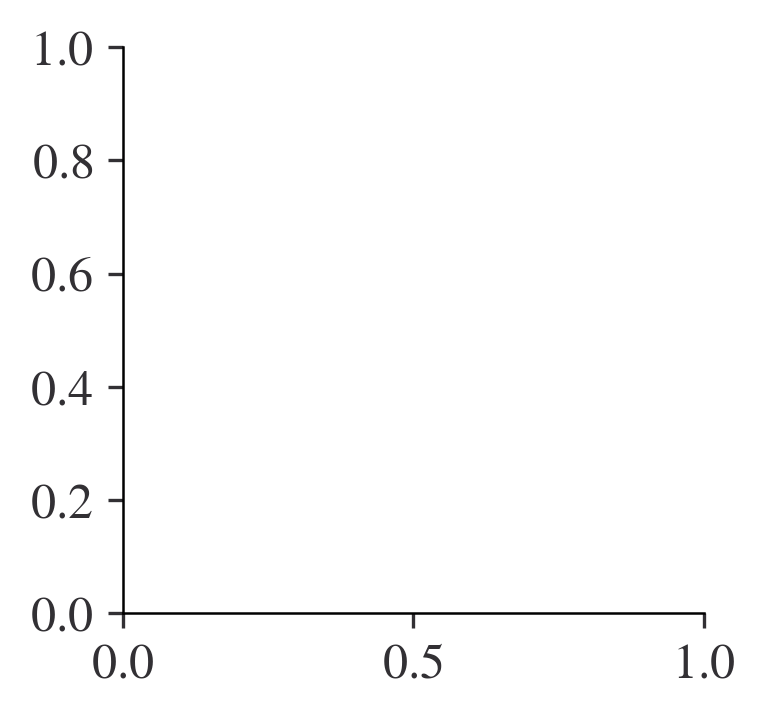

In [10]:
x=df_lapan_gc['OBS']
y = df_lapan_gc['GChem']
# fig, axs = plt.subplots(1, 3, figsize=(9, 2), sharey=True)
fig = plt.figure(figsize=(2.5,2.5),dpi=300)
ax = plt.subplot(111)

obs_1=x[0]
model_1= y[0]
ts = tinv(0.05, len(x)-2)
# ax.xaxis.set_major_locator(MaxNLocator(6))
# ax.yaxis.set_major_locator(MaxNLocator(6))

# ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.yaxis.set_minor_locator(MultipleLocator(1))


#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
plt.plot(x, line, 'r', label='$y={:.2f}x + {:.2f}$'.format(slope,intercept))
plt.plot(obs_1, model_1, 'w', label=f"R$^2$: {r_value**2:.2f}")
# plt.plot(obs_1, model_1, 'w', label=f"slope (95%): {slope:.2f} $\pm$ {ts*std_err:.2f}")




plt.scatter(x,y, color="k", s=3.5)
plt.legend(fontsize=9, loc='right', frameon=False, bbox_to_anchor=(1.2,0.1))
plt.xlabel('Observations (ng$\cdot m^{-3}$)', fontsize=9)
plt.ylabel('Model (ng$\cdot m^{-3}$)', fontsize=9)
plt.title('Base (ASGM = ON) vs. PAS Hg Concentrations', fontsize=8, pad=0.1, color='k', weight='bold')
plt.ylim(0.5,1.5)
plt.xlim(0,2.5)
plt.show()
fig_name='07-20-22_all-pas-mod_mean_scatter.pdf'
path=fig_path+fig_name
fig.savefig(path, bbox_inches='tight')

# Regression Plot for 6 PAS Station NEAR GMOS

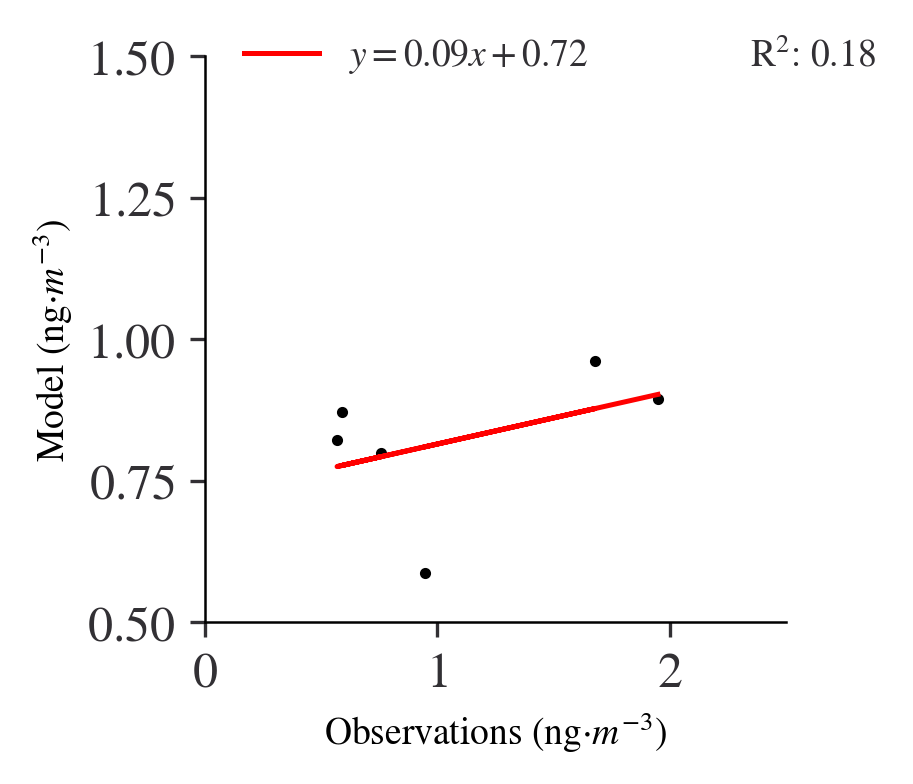

In [ ]:
x=df_pas['OBS']
y = df_pas['GChem']
# fig, axs = plt.subplots(1, 3, figsize=(9, 2), sharey=True)
fig = plt.figure(figsize=(2.5,2.5),dpi=300)
ax = plt.subplot(111)

obs_1=x[0]
model_1= y[0]
ts = tinv(0.05, len(x)-2)



#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
plt.plot(x, line, 'r', label='$y={:.2f}x + {:.2f}$'.format(slope,intercept))
plt.plot(obs_1, model_1, 'w', label=f"R$^2$: {r_value**2:.2f}")

plt.scatter(x,y, color="k", s=3.5)
plt.legend(fontsize=9, loc='right',ncol=2, frameon=False, bbox_to_anchor=(1.2,1.0))#
plt.xlabel('Observations (ng$\cdot m^{-3}$)', fontsize=9)
plt.ylabel('Model (ng$\cdot m^{-3}$)', fontsize=9)
# plt.title('Base (ASGM = ON) vs. PAS Hg Concentrations', fontsize=8, pad=0.1, color='k', weight='bold')
plt.ylim(0.5,1.5)
plt.xlim(0,2.5)
plt.show()
fig_name='07-20-22_pas-mod_mean_scatter.pdf'
path=fig_path+fig_name
fig.savefig(path, bbox_inches='tight')

## Plot with sns

<AxesSubplot:xlabel='OBS', ylabel='GChem'>

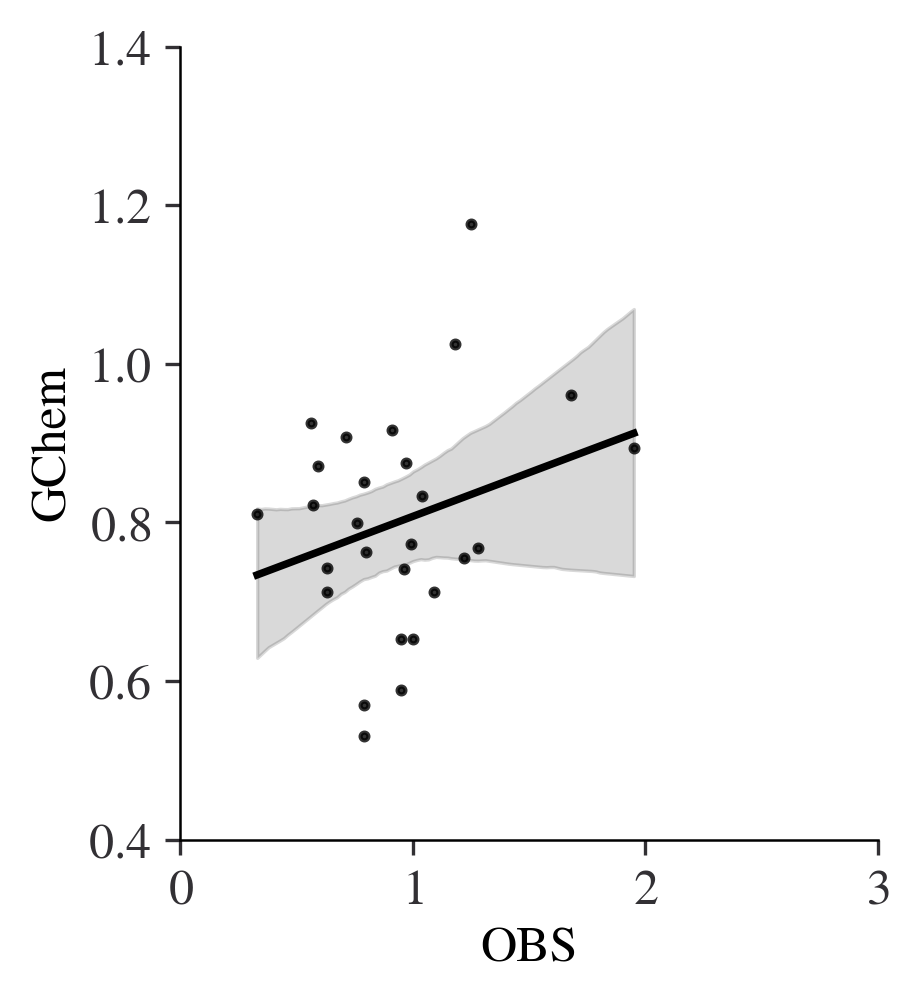

In [ ]:
fig = plt.figure(figsize=(3,3.5), dpi=300)
ax = plt.subplot(111)
sns.regplot(x,y, ax=ax, color="k", scatter_kws={"s":3.5})

# Gegression for GMOS

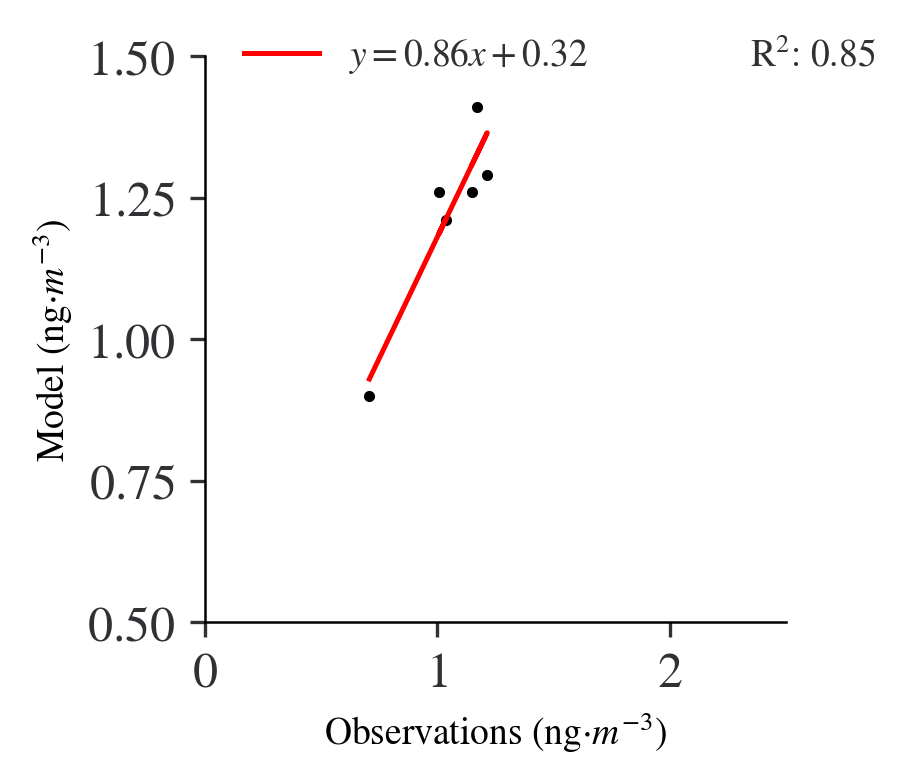

In [ ]:
x=df_gmos_gc['Hg_observed_mean']
y = df_gmos_gc['Hg_predicted_mean']
# fig, axs = plt.subplots(1, 3, figsize=(9, 2), sharey=True)
fig = plt.figure(figsize=(2.5,2.5),dpi=300)
ax = plt.subplot(111)

obs_1=x[0]
model_1= y[0]
ts = tinv(0.05, len(x)-2)



#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
plt.plot(x, line, 'r', label='$y={:.2f}x + {:.2f}$'.format(slope,intercept))
plt.plot(obs_1, model_1, 'w', label=f"R$^2$: {r_value**2:.2f}")

plt.scatter(x,y, color="k", s=3.5)
plt.legend(fontsize=9, loc='right',ncol=2, frameon=False, bbox_to_anchor=(1.2,1.0))
plt.xlabel('Observations (ng$\cdot m^{-3}$)', fontsize=9)
plt.ylabel('Model (ng$\cdot m^{-3}$)', fontsize=9)
# plt.title('Base (ASGM = ON) vs. PAS Hg Concentrations', fontsize=8, pad=0.1, color='k', weight='bold')
plt.ylim(0.5,1.5)
plt.xlim(0,2.5)
plt.show()
fig_name='07-20-22_gmos-mod_mean_scatter.pdf'
path=fig_path+fig_name
fig.savefig(path, bbox_inches='tight')